/tmp/ipython-input-2-3126003688.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(['BTC-USD','TSLA'], start='2024-01-01', end='2024-12-31')
[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-2-3126003688.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


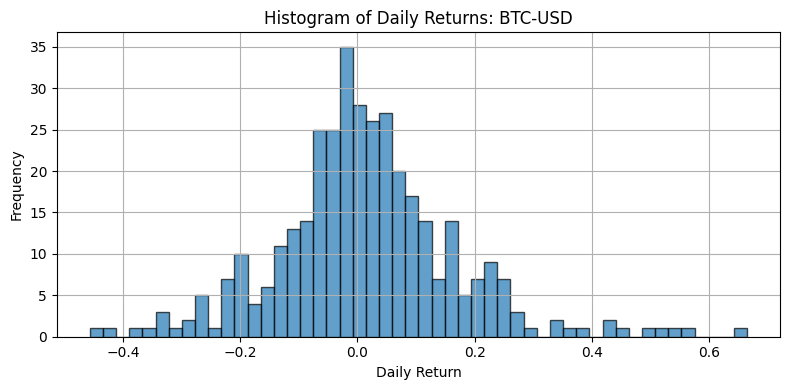

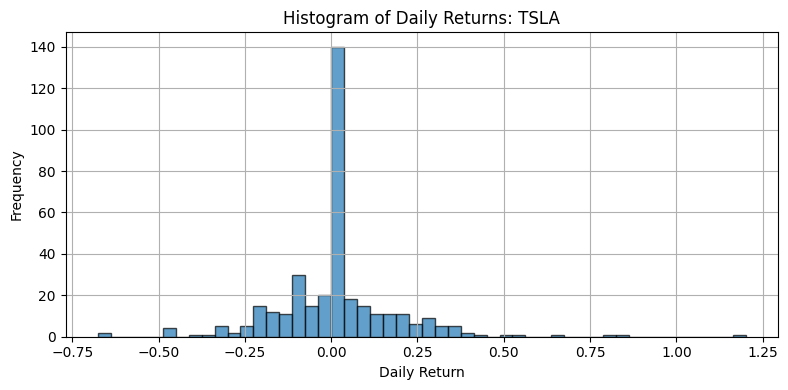

30-Day Value at Risk (95% Confidence):
BTC-USD: 0.2233
TSLA: 0.2312


In [2]:
#Historical Value at risk
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download historical price data for BTC, TSLA, and Gold
data = yf.download(['BTC-USD','TSLA'], start='2024-01-01', end='2024-12-31')
# Step 2: Extract 'Adj Close' prices from the multi-level columns
prices = data["Close"]  # This is now a clean DataFrame with BTC-USD, TSLA, GC=F

# Step 3: Compute daily percentage returns
returns = prices.pct_change().dropna()

# Step 4: Set parameters
confidence = 0.95
days = 30

# Plot histogram of daily returns
for asset in returns.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(returns[asset]* np.sqrt(days), bins=50, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Daily Returns: {asset}")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Calculate historical 1-day VaR for each asset
var_daily = {}
for asset in returns.columns:
    daily_loss = np.percentile(returns[asset], (1 - confidence) * 100)
    var_daily[asset] = -daily_loss  # Make it a positive number

# Step 6: Scale to 30-day VaR assuming IID returns
var_30d = {asset: var * np.sqrt(days) for asset, var in var_daily.items()}

# Step 7: Display the results
print("30-Day Value at Risk (95% Confidence):")
for asset, var in var_30d.items():
    print(f"{asset}: {var:.4f}")

In [3]:
data

Price              Close                      High                       Low  \
Ticker           BTC-USD        TSLA       BTC-USD        TSLA       BTC-USD   
Date                                                                           
2023-01-01  16625.080078         NaN  16630.439453         NaN  16521.234375   
2023-01-02  16688.470703         NaN  16759.343750         NaN  16572.228516   
2023-01-03  16679.857422  108.099998  16760.447266  118.800003  16622.371094   
2023-01-04  16863.238281  113.639999  16964.585938  114.589996  16667.763672   
2023-01-05  16836.736328  110.339996  16884.021484  111.750000  16790.283203   
...                  ...         ...           ...         ...           ...   
2024-12-26  95795.515625  454.130005  99884.570312  465.329987  95137.882812   
2024-12-27  94164.859375  431.660004  97294.843750  450.000000  93310.742188   
2024-12-28  95163.929688         NaN  95525.898438         NaN  94014.289062   
2024-12-29  93530.226562         NaN  95174.875000         NaN  92881.789062   
2024-12-30  92643.210938  417.410004  94903.320312  427.000000  91317.132812   

Price                           Open                   Volume               
Ticker            TSLA       BTC-USD        TSLA      BTC-USD         TSLA  
Date                                                                        
2023-01-01         NaN  16547.914062         NaN   9244361700          NaN  
2023-01-02         NaN  16625.509766         NaN  12097775227          NaN  
2023-01-03  104.639999  16688.847656  118.470001  13903079207  231402800.0  
2023-01-04  107.519997  16680.205078  109.110001  18421743322  180389000.0  
2023-01-05  107.160004  16863.472656  110.510002  13692758566  157986300.0  
...                ...           ...         ...          ...          ...  
2024-12-26  451.019989  99297.695312  465.160004  47054980873   76366400.0  
2024-12-27  426.500000  95704.976562  449.519989  52419934565   82666800.0  
2024-12-28         NaN  94160.187500         NaN  24107436185          NaN  
2024-12-29         NaN  95174.054688         NaN  29635885267          NaN  
2024-12-30  415.750000  93527.195312  419.399994  56188003691   64941000.0  

[730 rows x 10 columns]

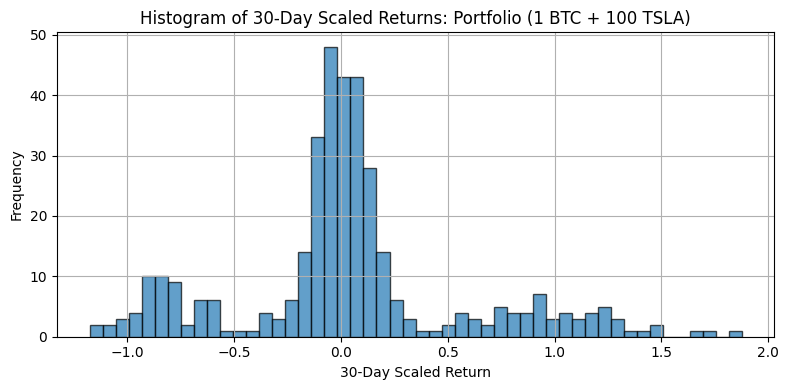


30-Day Portfolio VaR (95% Confidence) for 1 BTC + 100 TSLA:
0.8778


In [4]:
# Step 8: Define portfolio holdings
holdings = {'BTC-USD': 1, 'TSLA': 50}

# Step 9: Calculate daily portfolio value
portfolio_value = (prices[['BTC-USD', 'TSLA']] * pd.Series(holdings)).sum(axis=1)

# Step 10: Calculate daily returns of the portfolio
portfolio_returns = portfolio_value.pct_change().dropna()

# Step 11: Plot histogram of portfolio returns scaled to 30-day
plt.figure(figsize=(8, 4))
plt.hist(portfolio_returns * np.sqrt(days), bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of 30-Day Scaled Returns: Portfolio (1 BTC + 100 TSLA)")
plt.xlabel("30-Day Scaled Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Compute 1-day portfolio VaR
portfolio_var_daily = -np.percentile(portfolio_returns, (1 - confidence) * 100)

# Step 13: Compute 30-day portfolio VaR
portfolio_var_30d = portfolio_var_daily * np.sqrt(days)

# Step 14: Display the result
print("\n30-Day Portfolio VaR (95% Confidence) for 1 BTC + 100 TSLA:")
print(f"{portfolio_var_30d:.4f}")
